In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [3]:
import lightning as L
from lightning.pytorch.callbacks import LearningRateFinder

from utils import get_device
from model import BaseNet
from dataset import CIFAR10DataModule
from transform import get_transforms
from model_utils import get_incorrrect_predictions
from visualize import plot_incorrect_predictions

%reload_ext tensorboard
%matplotlib inline

L.seed_everything(42)

Global seed set to 42


42

In [4]:
device = get_device()

# Parameters
max_epochs = 24
batch_size = 512

# Load Data
train_transforms, test_transforms = get_transforms()
cifar10 = CIFAR10DataModule(train_transforms, test_transforms, batch_size=batch_size)
class_map = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


# Trainer
trainer = L.Trainer(max_epochs=max_epochs, callbacks=[LearningRateFinder(min_lr=1e-5, max_lr=10, num_training_steps=200)])

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:

# Model
model = BaseNet(learning_rate=1e-3, epochs=max_epochs)

# Train
trainer.fit(model, datamodule=cifar10)

# Test
trainer.test(model, datamodule=cifar10)

# Save the Model
trainer.save_checkpoint('cifar10_model.ckpt')

Files already downloaded and verified
Files already downloaded and verified


Loading `train_dataloader` to estimate number of stepping batches.
Finding best initial lr:  72%|███████▎  | 145/200 [01:43<00:39,  1.40it/s]
LR finder stopped early after 145 steps due to diverging loss.
Learning rate set to 3.235936569296283e-05
Restoring states from the checkpoint path at /Users/vamsikrishna/personal/repos/era/s12/.lr_find_c4f03f7d-00e6-4146-9f6a-95e5d55537f3.ckpt
Restored all states from the checkpoint at /Users/vamsikrishna/personal/repos/era/s12/.lr_find_c4f03f7d-00e6-4146-9f6a-95e5d55537f3.ckpt

  | Name | Type       | Params
------------------------------------
0 | prep | Sequential | 1.9 K 
1 | c1   | Sequential | 74.0 K
2 | c2   | Sequential | 221 K 
3 | c3   | Sequential | 295 K 
4 | c4   | Sequential | 1.2 M 
5 | c5   | Sequential | 3.5 M 
6 | pool | MaxPool2d  | 0     
7 | fc   | Sequential | 5.1 K 
------------------------------------
5.3 M     Trainable params
0         Non-trainable params
5.3 M     Total params
21.279    Total estimated model params si

Epoch 23: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s, v_num=6, train_acc_step=0.906, train_loss=0.377, val_acc=0.833, val_loss=0.481, train_acc_epoch=0.904]

`Trainer.fit` stopped: `max_epochs=24` reached.


Epoch 23: 100%|██████████| 79/79 [00:57<00:00,  1.38it/s, v_num=6, train_acc_step=0.906, train_loss=0.377, val_acc=0.833, val_loss=0.481, train_acc_epoch=0.904]
Files already downloaded and verified
Files already downloaded and verified
Testing DataLoader 0: 100%|██████████| 20/20 [00:03<00:00,  6.34it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8579999804496765     │
│         test_loss         │    0.4292580485343933     │
└───────────────────────────┴───────────────────────────┘

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Incorrect Predictions (Target/Predicted)


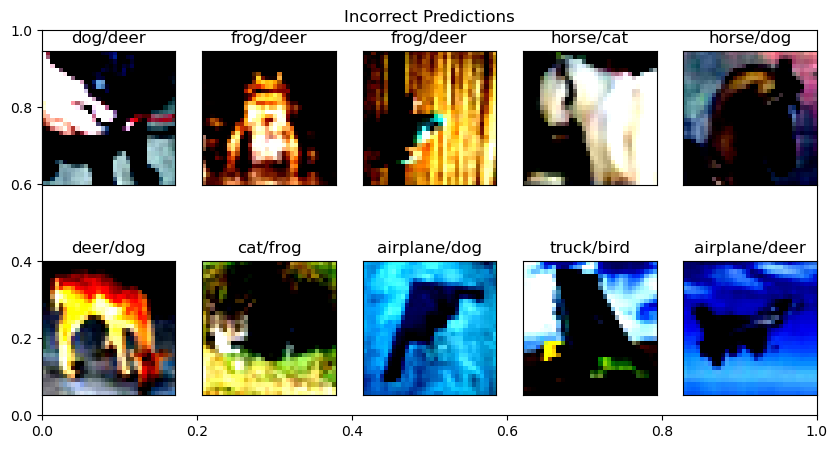

In [6]:
test_data = cifar10.test_dataloader()

trained_model = BaseNet.load_from_checkpoint('cifar10_model.ckpt')
preds = get_incorrrect_predictions(trained_model.to(device), test_data, device)
plot_incorrect_predictions(preds, class_map, "Incorrect Predictions", 10)

In [9]:
%tensorboard --logdir ./lightning_logs/

Reusing TensorBoard on port 6006 (pid 51337), started 0:09:28 ago. (Use '!kill 51337' to kill it.)